In [17]:
import pandas as pd
import pickle
import sweetviz
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter

In [27]:
#option d'affichage pour les df
pd.options.display.max_rows = 999
pd.options.display.max_columns = None

## Chargement des données

In [4]:
#chargement du dictionnaire de df des rames en pickle
# dictionnaire avec clé = rame, valeur : toutes les données à la suite
with open('dict_df.pkl', 'rb') as file:
    dict_rames = pickle.load(file)

In [5]:
#sauvegarde du dictionnaire des missions en fonction des rames dans un pickle
# dico clé = rame valeur = dictionnaire dont la clé est la mission, et les valeurs les données
with open('dict_rame_missions.pkl', 'rb') as file:      
    dict_missions = pickle.load(file)

In [6]:
# rames dans le df des rames
list(dict_rames.keys())

['z5500503', 'z5500515']

# Données d'une rame

In [7]:
# analyse de la rame 515
df = dict_rames['z5500515']

In [28]:
df

,x__IMISSIONTRAINNUMBER,WC_CAR01_LCST_ISYSTEMLIFESIGN,WC_CAR03_LCST_ISYSTEMLIFESIGN,WC_CAR05_LCST_ISYSTEMLIFESIGN,WC_CAR07_LCST_ISYSTEMLIFESIGN,WC_CAR01_LCST_IWSUTANKLEVEL,WC_CAR03_LCST_IWSUTANKLEVEL,WC_CAR05_LCST_IWSUTANKLEVEL,WC_CAR07_LCST_IWSUTANKLEVEL,WC_CAR01_LCST_IFWTANKCONTENT,WC_CAR03_LCST_IFWTANKCONTENT,WC_CAR05_LCST_IFWTANKCONTENT,WC_CAR07_LCST_IFWTANKCONTENT,WC_CAR01_LCST_IWWTANKCONTENT,WC_CAR03_LCST_IWWTANKCONTENT,WC_CAR05_LCST_IWWTANKCONTENT,WC_CAR07_LCST_IWWTANKCONTENT,WC_CAR01_LCST_IWCWORKTIME,WC_CAR03_LCST_IWCWORKTIME,WC_CAR05_LCST_IWCWORKTIME,WC_CAR07_LCST_IWCWORKTIME,WC_CAR01_LCST_IWCWORKTIMEINCOMSERVICE,WC_CAR03_LCST_IWCWORKTIMEINCOMSERVICE,WC_CAR05_LCST_IWCWORKTIMEINCOMSERVICE,WC_CAR07_LCST_IWCWORKTIMEINCOMSERVICE,WC_CAR01_LCST_IDOORCYCLCNT,WC_CAR03_LCST_IDOORCYCLCNT,WC_CAR05_LCST_IDOORCYCLCNT,WC_CAR07_LCST_IDOORCYCLCNT,WC_CAR01_LCST_IFLUSHCNT,WC_CAR03_LCST_IFLUSHCNT,WC_CAR05_LCST_IFLUSHCNT,WC_CAR07_LCST_IFLUSHCNT,WC_CAR01_LCST_IEJECTORCNT,WC_CAR03_LCST_IEJECTORCNT,WC_CAR05_LCST_IEJECTORCNT,WC_CAR07_LCST_IEJECTORCNT,WC_CAR01_LCST_IWATERTAPCNT,WC_CAR03_LCST_IWATERTAPCNT,WC_CAR05_LCST_IWATERTAPCNT,WC_CAR07_LCST_IWATERTAPCNT,WC_CAR01_LCST_IDELIMINGCNT,WC_CAR03_LCST_IDELIMINGCNT,WC_CAR05_LCST_IDELIMINGCNT,WC_CAR07_LCST_IDELIMINGCNT,WC_CAR01_LCST_IDEFROSTCNT,WC_CAR03_LCST_IDEFROSTCNT,WC_CAR05_LCST_IDEFROSTCNT,WC_CAR07_LCST_IDEFROSTCNT,WC_CAR01_LCST_IFWT05CNT,WC_CAR03_LCST_IFWT05CNT,WC_CAR05_LCST_IFWT05CNT,WC_CAR07_LCST_IFWT05CNT,WC_CAR01_LCST_IWWT95CNT,WC_CAR03_LCST_IWWT95CNT,WC_CAR05_LCST_IWWT95CNT,WC_CAR07_LCST_IWWT95CNT,WC_CAR01_LCST_FWCOUTOFSERVICE,WC_CAR03_LCST_FWCOUTOFSERVICE,WC_CAR05_LCST_FWCOUTOFSERVICE,WC_CAR07_LCST_FWCOUTOFSERVICE,WC_CAR01_LCST_IWCREADY,WC_CAR03_LCST_IWCREADY,WC_CAR05_LCST_IWCREADY,WC_CAR07_LCST_IWCREADY,WC_CAR01_LCST_FFWTEMPTY,WC_CAR03_LCST_FFWTEMPTY,WC_CAR05_LCST_FFWTEMPTY,WC_CAR07_LCST_FFWTEMPTY
0,3836323538372020,64107.0,64101.0,64177.0,64144.0,81.0,53.0,77.0,29.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,126991619.0,124385046.0,125223598.0,115849430.0,49573374.0,48529062.0,49639984.0,46855107.0,31838.0,38710.0,52636.0,50744.0,279740.0,396726.0,245040.0,231453.0,669140.0,636846.0,523452.0,138039.0,17585.0,16965.0,20168.0,19555.0,8.0,9.0,6.0,8.0,2052.0,1927.0,2306.0,2133.0,4129119.0,12962598.0,13743.0,5330952.0,2330363.0,729869.0,86990.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3836323538372020,64107.0,64101.0,64177.0,64144.0,81.0,53.0,77.0,29.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,126991619.0,124385046.0,125223598.0,115849430.0,49573374.0,48529062.0,49639984.0,46855107.0,31838.0,38710.0,52636.0,50744.0,279740.0,396726.0,245040.0,231453.0,669140.0,636846.0,523452.0,138039.0,17585.0,16965.0,20168.0,19555.0,8.0,9.0,6.0,8.0,2052.0,1927.0,2306.0,2133.0,4129119.0,12962598.0,13743.0,5330952.0,2330363.0,729869.0,86990.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3836323538372020,64107.0,64101.0,64179.0,64144.0,81.0,53.0,78.0,29.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,126991619.0,124385046.0,125223598.0,115849430.0,49573374.0,48529062.0,49639984.0,46855107.0,31838.0,38710.0,52636.0,50744.0,279740.0,396726.0,245040.0,231453.0,669140.0,636846.0,523452.0,138039.0,17585.0,16965.0,20168.0,19555.0,8.0,9.0,6.0,8.0,2052.0,1927.0,2306.0,2133.0,4129119.0,12962598.0,13743.0,5330952.0,2330363.0,729869.0,86990.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3836323538372020,64109.0,64103.0,64181.0,64146.0,78.0,52.0,78.0,29.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,126991619.0,124385046.0,125223598.0,115849430.0,49573374.0,48529062.0,49639984.0,46855107.0,31838.0,38710.0,52636.0,50744.0,279740.0,396726.0,245040.0,231453.0,669140.0,636846.0,523452.0,138039.0,17585.0,16965.0,20168.0,19555.0,8.0,9.0,6.0,8.0,2052.0,1927.0,2306.0,2133.0,4129119.0,12962598.0,13743.0,5330952.0,2330363.0,729869.0,86990.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3836323538372020,64109.0,64103.0,64181.0,64146.0,78.0,52.0,78.0,29.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,126991619.0,124385046.0,125223598.0,115849430.0,49573

## Données temporelles simples


In [9]:
columns = df.columns

In [10]:
nb_graphes = len(columns)

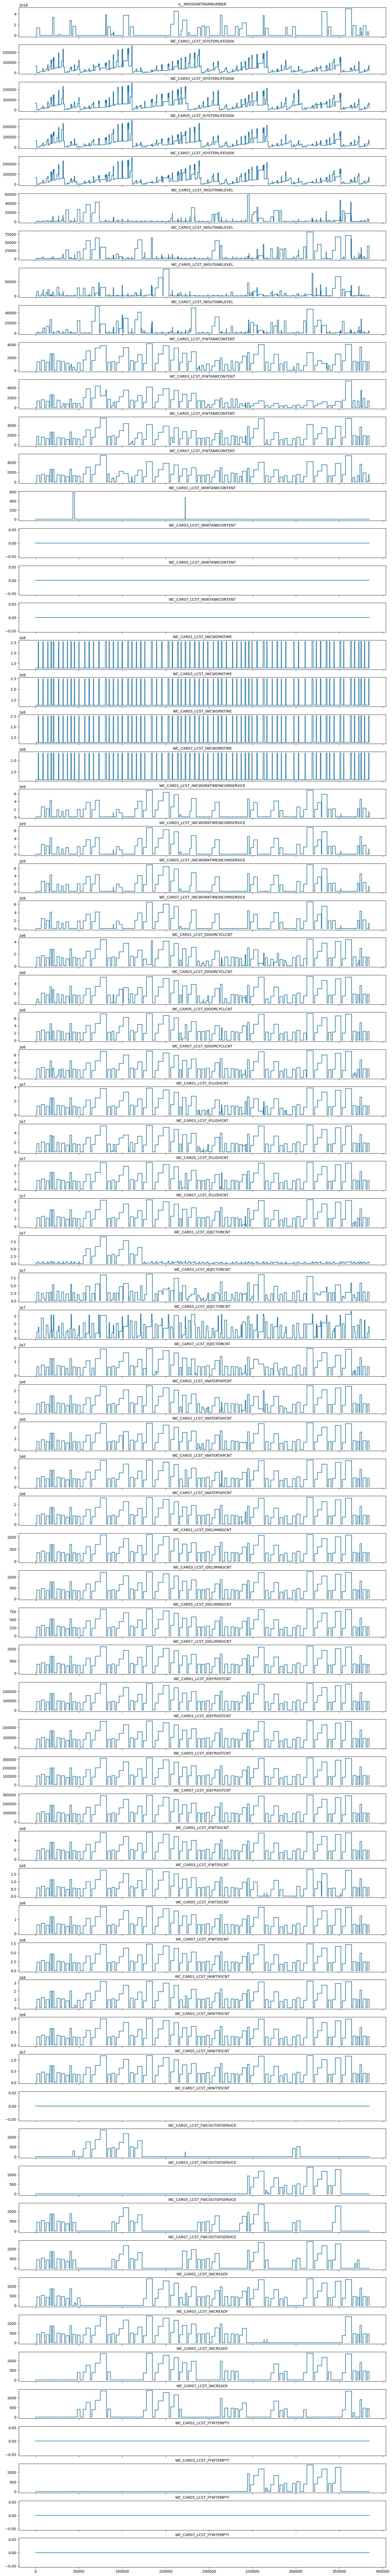

In [11]:
fig, ax = plt.subplots(ncols=1, nrows=nb_graphes, sharex=True)
fig.set_size_inches(15, 100)
fig.tight_layout(pad=1.2)

for i,col in enumerate(columns) :
    df.loc[:,col].plot(ax=ax[i])
    ax[i].set_title(col, fontdict = {'fontsize':10})

## Croisement de différentes catégories de données entre elles

In [19]:
# on va sélectionner différentes typologies de données
# on les compte pour savoir combien il y a de voitures 
# puis on transforme en set : ainsi, on aura supprimé les doublons et on pourra itérer
typo = [col.split('_')[-1] for col in columns]
set_typo = set(typo)
Counter(typo)


Counter({'IMISSIONTRAINNUMBER': 1,
         'ISYSTEMLIFESIGN': 4,
         'IWSUTANKLEVEL': 4,
         'IFWTANKCONTENT': 4,
         'IWWTANKCONTENT': 4,
         'IWCWORKTIME': 4,
         'IWCWORKTIMEINCOMSERVICE': 4,
         'IDOORCYCLCNT': 4,
         'IFLUSHCNT': 4,
         'IEJECTORCNT': 4,
         'IWATERTAPCNT': 4,
         'IDELIMINGCNT': 4,
         'IDEFROSTCNT': 4,
         'IFWT05CNT': 4,
         'IWWT95CNT': 4,
         'FWCOUTOFSERVICE': 4,
         'IWCREADY': 4,
         'FFWTEMPTY': 4})

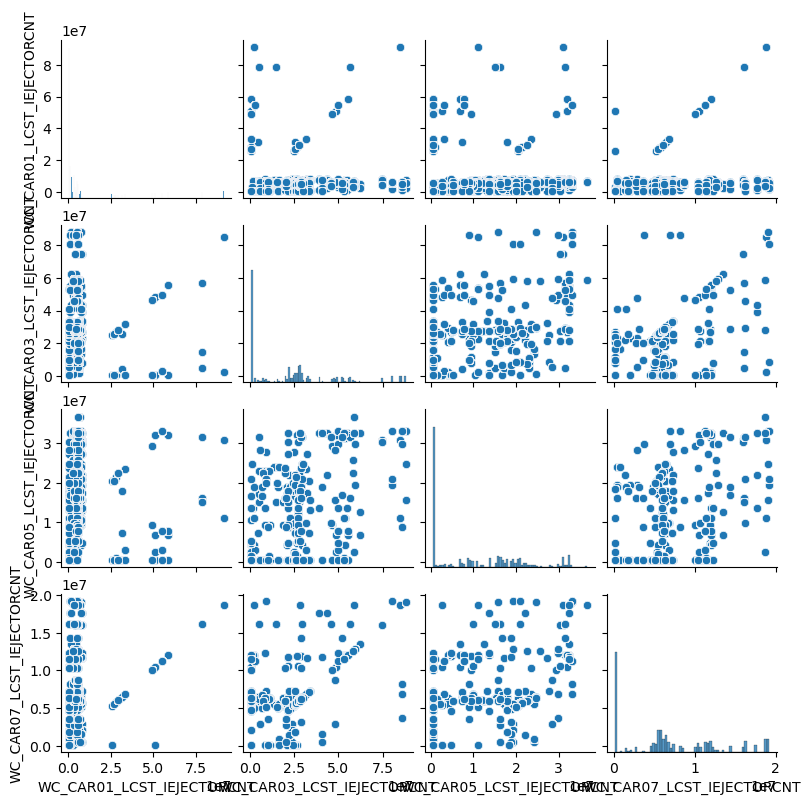

In [23]:
typo_retenue = 'IEJECTORCNT'
columns_typo = [col for col in columns if typo_retenue in col]
sns.pairplot(df, vars = columns_typo, height=2)

## Analyse des distributions

In [ ]:
my_report = sweetviz.analyze(df)
my_report.show_html(layout='vertical')